In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# Scatterplot matrix.
# Default plot aesthetics.
sns.set_style("white")

df = pd.read_csv('FIFA 2018 Statistics.csv')
df.tail()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,...,1,0,0,No,28.0,Final,No,0,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


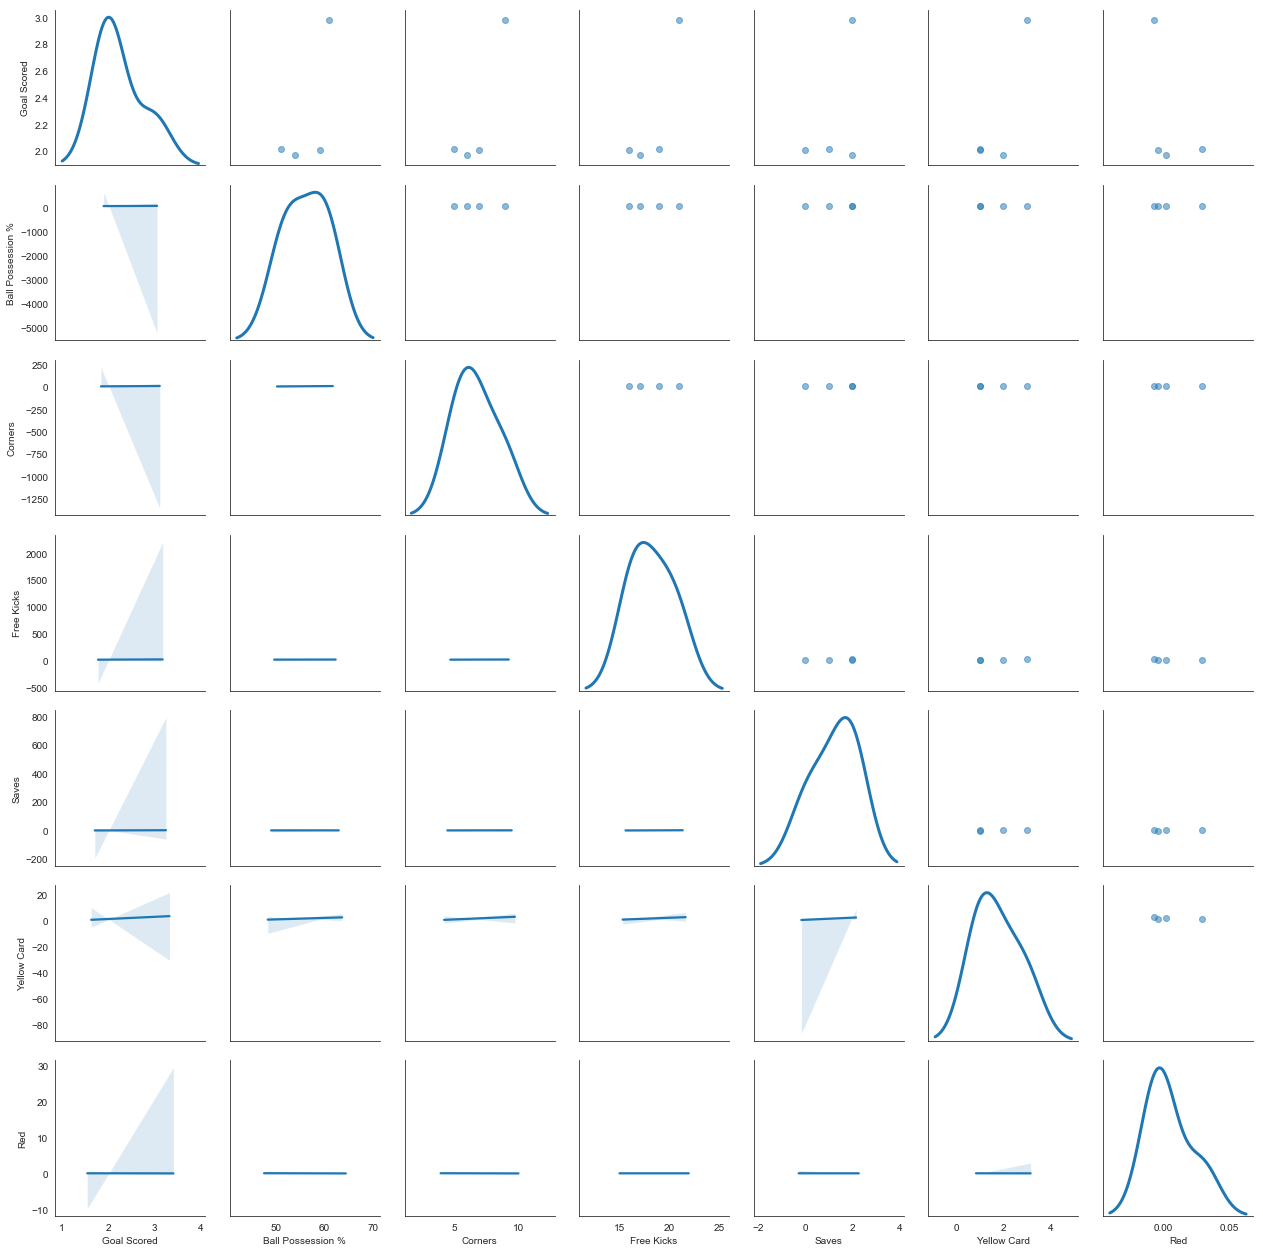

In [5]:
# Subset of data.
df_main = df.loc[
    ((df['Team'] == 'Belgium') | (df['Team'] == 'France') | (df['Team'] == 'England') | (df['Team'] == 'Croatia')),
    ['Team', 'Goal Scored', 'Ball Possession %', 'Corners', 'Free Kicks',
        'Saves', 'Yellow Card', 'Red']
]

# Make copy of data and add jitter.
df_jittered = df_main.loc[:, 'Goal Scored':'Red'].dropna()
# Making random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.03, .03, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and noise.
df_jittered = df_jittered.add(jitter)

# Make scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing linear relationships of two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give info about univariate distributions of variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


                   Goal Scored  Ball Possession %   Corners  Free Kicks  \
Goal Scored           1.000000          -0.115824 -0.140807    0.026481   
Ball Possession %    -0.115824           1.000000  0.467145   -0.038568   
Corners              -0.140807           0.467145  1.000000    0.201648   
Free Kicks            0.026481          -0.038568  0.201648    1.000000   
Saves                -0.144982          -0.138020  0.047610   -0.011134   
Yellow Card           0.044757          -0.115591 -0.131546    0.289204   
Red                        NaN                NaN       NaN         NaN   

                      Saves  Yellow Card  Red  
Goal Scored       -0.144982     0.044757  NaN  
Ball Possession % -0.138020    -0.115591  NaN  
Corners            0.047610    -0.131546  NaN  
Free Kicks        -0.011134     0.289204  NaN  
Saves              1.000000     0.145410  NaN  
Yellow Card        0.145410     1.000000  NaN  
Red                     NaN          NaN  NaN  


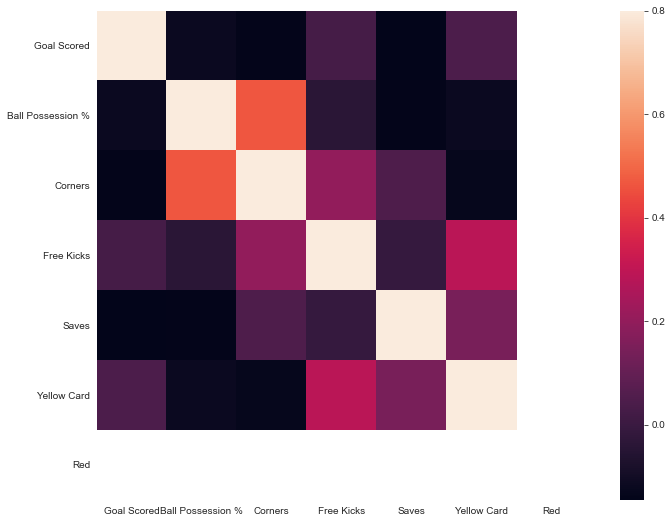

In [7]:
# Make the correlation matrix.
corrmat = df_main.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


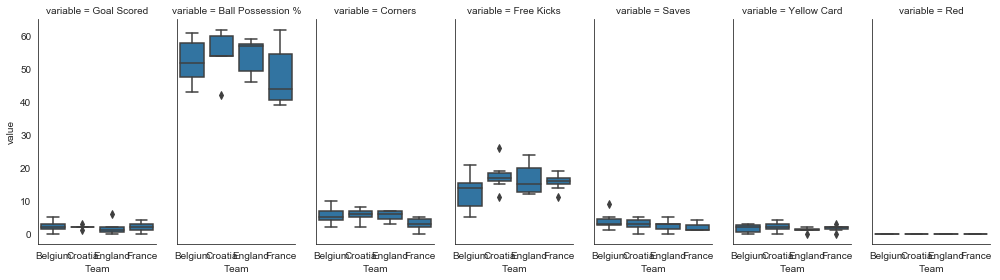

        Ball Possession %                                                     \
                    count       mean       std   min   25%   50%   75%   max   
Team                                                                           
Belgium               7.0  52.428571  7.322503  43.0  47.5  52.0  58.0  61.0   
Croatia               7.0  55.142857  6.743604  42.0  54.0  54.0  60.0  62.0   
England               7.0  53.714286  5.282496  46.0  49.5  57.0  57.5  59.0   
France                7.0  47.857143  9.263343  39.0  40.5  44.0  54.5  62.0   

        Corners           ...  Saves      Yellow Card                      \
          count      mean ...    75%  max       count      mean       std   
Team                      ...                                               
Belgium     7.0  5.571429 ...    4.5  9.0         7.0  1.571429  1.272418   
Croatia     7.0  5.714286 ...    4.0  5.0         7.0  2.142857  1.463850   
England     7.0  5.571429 ...    3.0  5.0         7.0 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: tuple indices must be integers or slices, not Series

In [10]:
# Plot all variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_main
df_long = pd.melt(df_long, id_vars=['Team'])

g = sns.FacetGrid(df_long, col="variable", height=4, aspect=.5)
g = g.map(sns.boxplot, "Team", "value", order=['Belgium', 'Croatia', 'England', 'France'])
plt.show()

# Descriptive statistics by group.
print(df_main.groupby('Team').describe())

# Test whether group differences are significant.
for col in df_main.loc[:,'Team':'Red'].columns:
    print(col)
    print(stats.ttest_ind(
        df_main[df_main['Team'] == 'Belgium'][col].dropna(),
        df_main[df_main['Team'] == 'Croatia'][col].dropna(),
        df_main[df_main['Team'] == 'England'][col].dropna(),
        df_main[df_main['Team'] == 'France'][col].dropna()
    ))
    

In [6]:
print(df_main)

        Team  Goal Scored  Ball Possession %  Corners  Free Kicks  Saves  \
8     France            2                 51        5          19      1   
14   Croatia            2                 54        6          17      2   
24   Belgium            3                 61        9          21      2   
27   England            2                 59        7          16      0   
42    France            1                 44        5          16      2   
45   Croatia            3                 42        2          18      3   
52   Belgium            5                 52        5          16      3   
58   England            6                 58        3          13      1   
73    France            0                 62        2          11      1   
79   Croatia            2                 59        5          11      5   
94   England            0                 48        7          15      3   
95   Belgium            1                 52        2          14      1   
96    France